# Machine Learning Fundamentals for Business Applications

This notebook provides a comprehensive introduction to machine learning concepts with a focus on business applications. It includes theoretical explanations, practical implementations, and real-world examples.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

## 1. INTRODUCTION TO MACHINE LEARNING

Machine Learning is a field of study that gives computers the ability to learn without being explicitly programmed. In business terms, it’s about creating systems that can automatically improve through experience.

### Key Business Applications:
1. Customer churn prediction
2. Sales forecasting
3. Fraud detection
4. Product recommendations
5. Risk assessment

In [8]:
def print_section_header(title):
    """Helper function to print section headers"""
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")

print_section_header("1. INTRODUCTION TO MACHINE LEARNING")


1. INTRODUCTION TO MACHINE LEARNING



### What is Machine Learning?

Machine Learning gives computers the ability to learn from data without explicit programming. In a business context, it enables systems to improve automatically through experience.

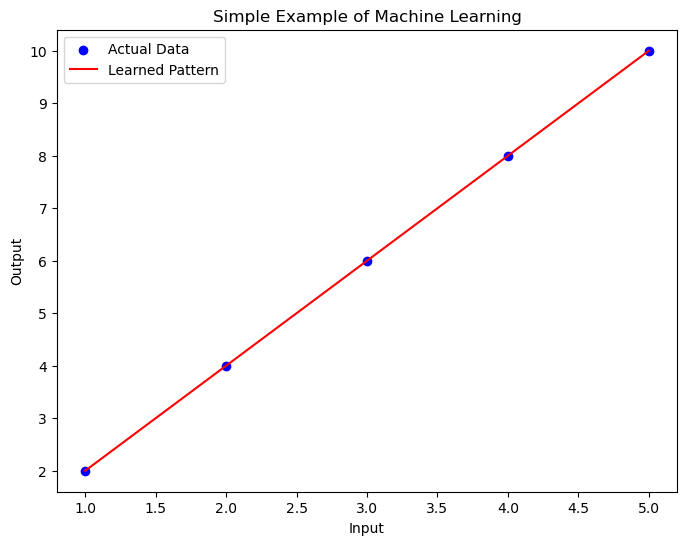


Model learned the pattern: y = 2.0 x + 0.0
This is a simple example of how ML can learn patterns from data.


In [9]:
def demonstrate_learning():
    # Generate sample data
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([2, 4, 6, 8, 10])
    
    # Create and fit a simple linear model
    model = LinearRegression()
    model.fit(X, y)
    
    # Make predictions
    predictions = model.predict(X)
    
    # Visualize the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, predictions, color='red', label='Learned Pattern')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Simple Example of Machine Learning')
    plt.legend()
    plt.show()
    
    print("\nModel learned the pattern: y =", model.coef_[0], "x +", model.intercept_)
    print("This is a simple example of how ML can learn patterns from data.")

demonstrate_learning()

#### Reflective Questions

- How might this simple learning example relate to real business problems?
- What types of business data could be analyzed using similar patterns?

## 2. TYPES OF MACHINE LEARNING

### Overview

1. **Supervised Learning:** Learning from labeled data
   - *Classification:* Predicting categories (e.g., customer churn yes/no)
   - *Regression:* Predicting continuous values (e.g., sales revenue)

2. **Unsupervised Learning:** Finding patterns in unlabeled data
   - *Clustering:* Grouping similar customers
   - *Dimensionality Reduction:* Simplifying complex data

3. **Reinforcement Learning:** Learning through trial and error (e.g., dynamic pricing, resource allocation)

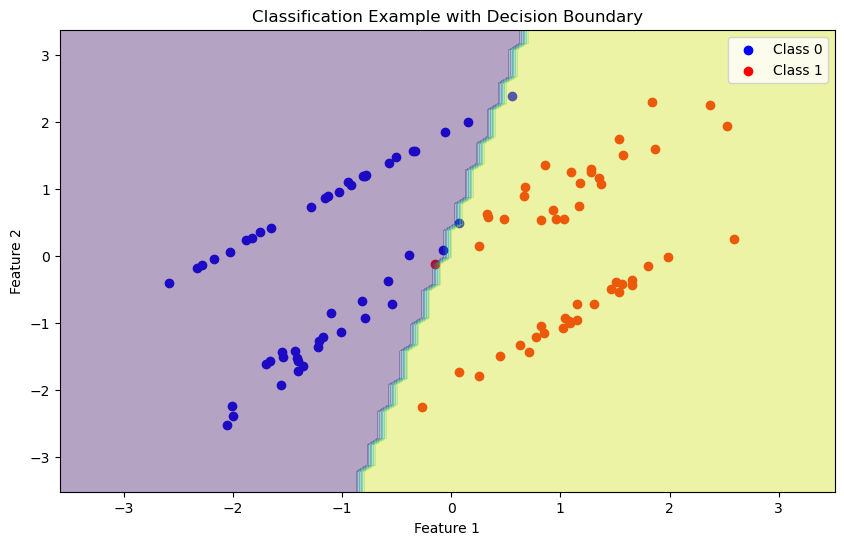


Classification Performance Metrics:
Accuracy: 0.950
Precision: 0.900
Recall: 1.000
F1 Score: 0.947


In [10]:
def demonstrate_classification():
    # Generate sample classification data
    X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               random_state=42)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
    
    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Classification Example with Decision Boundary')
    plt.legend()
    plt.show()
    
    # Print performance metrics
    print("\nClassification Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

demonstrate_classification()

#### Reflective Questions

- How would you interpret these performance metrics in a business context?
- What business decisions might be influenced by the model's precision vs. recall?

## 3. THE MACHINE LEARNING PROCESS

### Process Steps:
1. Data Collection and Preparation
2. Feature Engineering
3. Model Selection
4. Training and Validation
5. Model Evaluation
6. Deployment and Monitoring

#### Reflective Questions
- How would you interpret these learning curves in terms of model complexity?
- What business implications arise from choosing between simple and complex models?

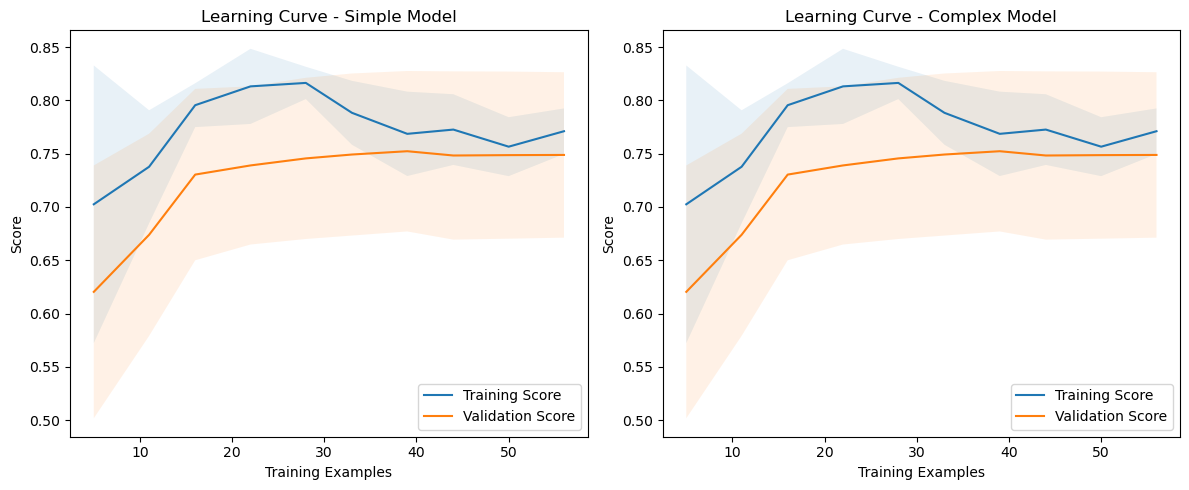


Model Evaluation:

Simple Model:
Training R²: 0.770
Validation R²: 0.722
Test R²: 0.716

Complex Model:
Training R²: 0.770
Validation R²: 0.722
Test R²: 0.716


In [11]:
def demonstrate_ml_process():
    # Generate sample regression data
    X, y = make_regression(n_samples=100, n_features=1, noise=10)
    
    # Split into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Train models with different complexities
    models = {
        'Simple': LinearRegression(),
        'Complex': LinearRegression()
    }
    
    # Plot learning curves
    plt.figure(figsize=(12, 5))
    
    for name, model in models.items():
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_train_scaled, y_train, cv=5,
            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        plt.subplot(1, 2, 1 if name == 'Simple' else 2)
        plt.plot(train_sizes, train_mean, label='Training Score')
        plt.plot(train_sizes, val_mean, label='Validation Score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
        plt.xlabel('Training Examples')
        plt.ylabel('Score')
        plt.title(f'Learning Curve - {name} Model')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate final models
    print("\nModel Evaluation:")
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        train_score = model.score(X_train_scaled, y_train)
        val_score = model.score(X_val_scaled, y_val)
        test_score = model.score(X_test_scaled, y_test)
        
        print(f"\n{name} Model:")
        print(f"Training R²: {train_score:.3f}")
        print(f"Validation R²: {val_score:.3f}")
        print(f"Test R²: {test_score:.3f}")

demonstrate_ml_process()

#### Reflective Questions

- How would you interpret these learning curves in terms of model complexity?
- What business implications arise from choosing between simple and complex models?

## 4. FEATURE ENGINEERING AND MODEL SELECTION

Transforming raw data into informative features is crucial for improving model performance, especially when incorporating domain knowledge in business applications.

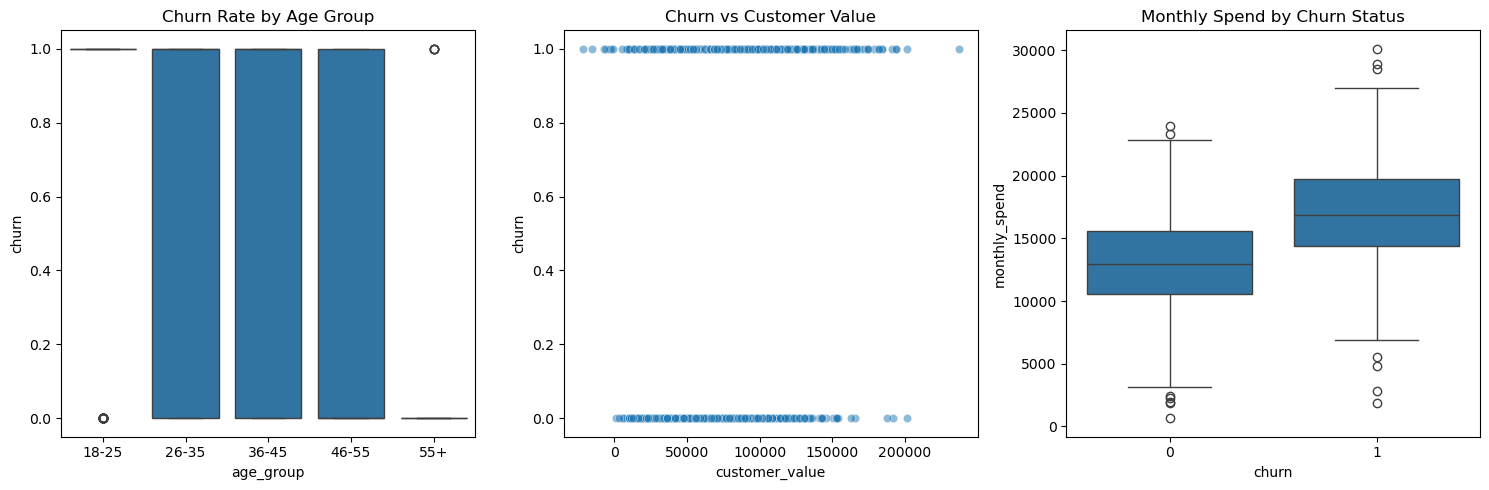


Feature Importance Analysis:
1. Age Group: Shows clear patterns in churn rates
2. Customer Value: Higher value customers tend to stay
3. Monthly Spend: Lower spend customers more likely to churn


In [12]:
def demonstrate_feature_engineering():
    # Create sample business data
    np.random.seed(42)
    n_samples = 1000
    
    # Generate raw features
    customer_age = np.random.normal(35, 10, n_samples)
    income = np.random.normal(50000, 15000, n_samples)
    years_customer = np.random.normal(5, 2, n_samples)
    
    # Create engineered features
    monthly_spend = income * 0.3 + np.random.normal(0, 1000, n_samples)
    customer_value = monthly_spend * years_customer
    age_group = pd.cut(customer_age, bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
    
    # Create target variable (customer churn)
    churn_prob = 1 / (1 + np.exp(-(-0.1 * customer_age + 0.0001 * income - 0.2 * years_customer)))
    churn = (np.random.random(n_samples) < churn_prob).astype(int)
    
    # Create DataFrame
    df = pd.DataFrame({
        'age': customer_age,
        'income': income,
        'years_customer': years_customer,
        'monthly_spend': monthly_spend,
        'customer_value': customer_value,
        'age_group': age_group,
        'churn': churn
    })
    
    # Visualize feature distributions
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x='age_group', y='churn', data=df)
    plt.title('Churn Rate by Age Group')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=df, x='customer_value', y='churn', alpha=0.5)
    plt.title('Churn vs Customer Value')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x='churn', y='monthly_spend', data=df)
    plt.title('Monthly Spend by Churn Status')
    
    plt.tight_layout()
    plt.show()
    
    # Print feature importance analysis
    print("\nFeature Importance Analysis:")
    print("1. Age Group: Shows clear patterns in churn rates")
    print("2. Customer Value: Higher value customers tend to stay")
    print("3. Monthly Spend: Lower spend customers more likely to churn")

demonstrate_feature_engineering()

#### Reflective Questions

- How would you use these insights to develop a customer retention strategy?
- What additional features might be valuable for predicting customer churn?

## 5. BUSINESS CASE: CUSTOMER CHURN PREDICTION

A telecommunications company wants to predict which customers are likely to cancel their service in the next month to implement targeted retention strategies.


Business Impact Analysis:
Total Customers: 400
Predicted Churners: 57
Actual Churners: 129

Potential Lost Revenue: $5,700.00

Detailed Performance Metrics:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       271
           1       0.49      0.22      0.30       129

    accuracy                           0.68       400
   macro avg       0.60      0.56      0.54       400
weighted avg       0.64      0.68      0.63       400



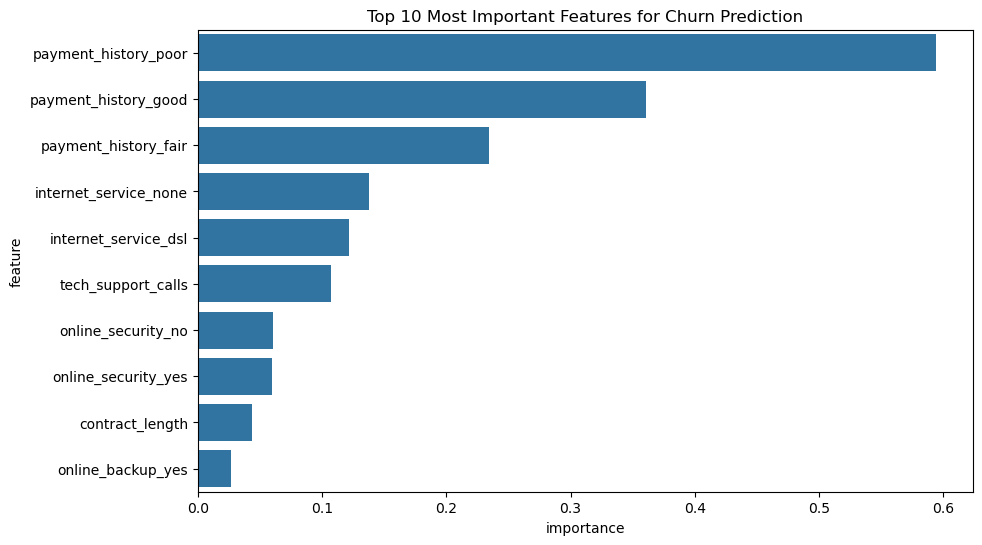

In [13]:
def implement_churn_prediction():
    # Generate more realistic business data
    np.random.seed(42)
    n_samples = 2000
    
    # Generate features
    data = {
        'monthly_charges': np.random.normal(100, 30, n_samples),
        'contract_length': np.random.randint(1, 25, n_samples),
        'tech_support_calls': np.random.poisson(2, n_samples),
        'payment_history': np.random.choice(['good', 'fair', 'poor'], n_samples),
        'internet_service': np.random.choice(['fiber', 'dsl', 'none'], n_samples),
        'online_security': np.random.choice(['yes', 'no'], n_samples),
        'online_backup': np.random.choice(['yes', 'no'], n_samples)
    }
    
    df = pd.DataFrame(data)
    
    # Create target variable (churn)
    churn_prob = (
        0.1 +  # Base churn rate
        0.2 * (df['monthly_charges'] > 100) +  # Higher charges increase churn
        0.1 * (df['contract_length'] < 12) +   # Shorter contracts more likely to churn
        0.15 * (df['tech_support_calls'] > 3) +  # More support calls increase churn
        0.2 * (df['payment_history'] == 'poor')  # Poor payment history increases churn
    )
    df['churn'] = (np.random.random(n_samples) < churn_prob).astype(int)
    
    # Prepare features
    X = pd.get_dummies(df.drop('churn', axis=1))
    y = df['churn']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print business metrics
    print("\nBusiness Impact Analysis:")
    print(f"Total Customers: {len(y_test)}")
    print(f"Predicted Churners: {sum(y_pred)}")
    print(f"Actual Churners: {sum(y_test)}")
    
    # Calculate potential revenue impact
    avg_monthly_revenue = 100  # Average monthly revenue per customer
    potential_lost_revenue = sum(y_pred) * avg_monthly_revenue
    print(f"\nPotential Lost Revenue: ${potential_lost_revenue:,.2f}")
    
    # Print detailed classification report
    print("\nDetailed Performance Metrics:")
    print(classification_report(y_test, y_pred))
    
    # Visualize feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': abs(model.coef_[0])
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Most Important Features for Churn Prediction')
    plt.show()

implement_churn_prediction()

#### Reflective Questions

- How would you use these predictions to develop a customer retention strategy?
- What ethical considerations should be taken into account when using this model?

## 6. CONCLUSION AND NEXT STEPS

### Key Takeaways:
1. Machine Learning can provide valuable insights for business decisions.
2. The quality of features often matters more than the choice of algorithm.
3. Model evaluation should focus on business impact, not just technical metrics.
4. Ethical considerations and bias must be addressed in ML applications.

### Next Steps:
1. Explore more advanced ML techniques (e.g., deep learning).
2. Learn about model deployment and monitoring.
3. Study ethical AI and responsible ML practices.
4. Practice with real business datasets.

### Final Business Challenge: Customer Segmentation for Marketing Campaign

A retail company wants to segment its customers to optimize marketing campaigns. Your task is to implement an unsupervised learning solution using the following starter code. 

#### Starter Code (functions to complete):
```python
def preprocess_customer_data(data):
    # TODO: Implement data preprocessing
    pass

def implement_kmeans(data, n_clusters=3):
    # TODO: Implement K-means clustering
    pass

def evaluate_clusters(data, labels):
    # TODO: Implement cluster evaluation
    pass

def visualize_segments(data, labels):
    # TODO: Create visualizations
    pass
```

#### Requirements:
- Identify 3 distinct customer segments with a silhouette score above 0.4.
- Each segment must contain at least 15% of the customers.
- Visualization must clearly show cluster separation.

#### Submission should include:
1. Complete implementation of all functions.
2. Printed evaluation metrics and visualization.
3. A brief explanation of the customer segments identified.

Example Output:
- Silhouette Score: 0.45
- Cluster Sizes: [30%, 35%, 35%]
- Segment Characteristics: High-value frequent buyers, moderate-value occasional buyers, low-value infrequent buyers.

Good luck with the challenge!